# OpenScope's Vision2Hippocampus Dataset

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [2]:
try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .
    %cd docs/projects

In [3]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import floor, ceil, isclose
from PIL import Image

### The Experiment

In [4]:
session_files = pd.read_csv("../../data/vippo_sessions.csv")
session_files

,Unnamed: 0,identifier,size,path,session_time,sub_name,sub_sex,sub_age,sub_genotype,probes,stim types,#_units,session_length
0,0,8ae65111-a130-47fc-a108-55e695374739,2448964467,sub-692077/sub-692077_ses-1300222049.nwb,2023-09-28 00:00:00-07:00,692077,F,89.0,wt/wt,"{'probeB', 'probeA', 'probeF', 'probeC', 'prob...",{'UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentation...,3091,7152.145567
1,1,b647cef9-a66e-457f-8bf2-61fbd1318b8a,2389430004,sub-692072/sub-692072_ses-1298465622.nwb,2023-09-21 00:00:00-07:00,692072,M,82.0,wt/wt,"{'probeA', 'probeE', 'probeB', 'probeF'}",{'UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentation...,2764,7157.128047
2,2,d3cfc0e4-eaa6-4cc0-b1de-9ed257cf0009,2237699442,sub-695435/sub-695435_ses-1309235849.nwb,2023-11-07 00:00:00-08:00,695435,M,109.0,wt/wt,"{'probeD', 'probeA', 'probeF', 'probeB'}",{'UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentation...,2251,7174.624310
3,3,24c71323-0446-4a06-83fa-f62ae21aba3e,2457471091,sub-715811/sub-715811_ses-1328842209.nwb,2024-02-06 00:00:00-08:00,715811,F,106.0,wt/wt,"{'probeB', 'probeA', 'probeF', 'probeC', 'prob...",{'Stim12_Disk_Wd15_Vel2_White_loop_presentatio...,2239,8117.399747
4,4,72e60080-722f-47f1-b8c0-91f9be1d5ef6,3073270590,sub-702134/sub-702134_ses-1324803287.nwb,2024-01-18 00:00:00-08:00,702134,F,135.0,wt/wt,"{'probeD', 'probeA', 'probeF', 'probeB'}",{'Stim12_Disk_Wd15_Vel2_White_loop_presentatio...,3477,8124.426097
5,5,9b14e3b4-5d3e-4121-ae5e-ced7bc92af4e,2892209972,sub-702135/sub-702135_ses-1324561527.nwb,2024-01-17 00:00:00-08:00,702135,F,134.0,wt/wt,"{'probeB', 'probeA', 'probeC', 'probeF', 'prob...",{'Stim12_Disk_Wd15_Vel2_White_loop_presentatio...,2960,8125.099337
6,6,9b1bed43-3edf-40f9-a172-eb4c33883166,2923746400,sub-714614/sub-714614_ses-1327183358.nwb,2024-01-30 00:00:00-08:00,714614,F,106.0,wt/wt,"{'probeB', 'probeA', 'probeC', 'probeF', 'prob...",{'Stim12_Disk_Wd15_Vel2_White_loop_presentatio...,3460,8113.779827
7,7,40238e89-d2d6-4132-9e72-229821286c0c,2555258252,sub-714612/sub-714612_ses-1325995398.nwb,2024-01-24 00:00:00-08:00,714612,M,100.0,wt/wt,"{'probeD', 'probeA', 'probeF', 'probeB'}",{'Stim12_Disk_Wd15_Vel2_White_loop_presentatio...,2342,8098.457047
8,8,5c6c5b31-1262-4a28-9783-fb3aafd1372c,2082205507,sub-714615/sub-714615_ses-1325748772.nwb,2024-01-23 00:00:00-08:00,714615,F,99.0,wt/wt,"{'probeA', 'probeF', 'probeB'}",{'Stim12_Disk_Wd15_Vel2_White_loop_presentatio...,2738,8218.034317
9,9,9c8ef583-a612-4e7b-90d9-c834806e84e2,2643094635,sub-715814/sub-715814_ses-1329090859.nwb,2024-02-07 00:00:00-08:00,715814,M,107.0,wt/wt,"{'probeB', 'probeA', 'probeF', 'probeC', 'prob...",{'Stim12_Disk_Wd15_Vel2_White_loop_presentatio...,2294,8116.172547


In [5]:
m_count = len(session_files["sub_sex"][session_files["sub_sex"] == "M"])
f_count = len(session_files["sub_sex"][session_files["sub_sex"] == "F"])
sst_count = len(session_files[session_files["sub_genotype"].str.count("Sst") >= 1])
pval_count = len(session_files[session_files["sub_genotype"].str.count("Pval") >= 1])
wt_count = len(session_files[session_files["sub_genotype"].str.count("wt/wt") >= 1])

print("Dandiset Overview:")
print(len(session_files), "files")
print(len(set(session_files["sub_name"])), "subjects", m_count, "males,", f_count, "females")
print(sst_count, "sst,", pval_count, "pval,", wt_count, "wt")

Dandiset Overview:
25 files
25 subjects 12 males, 13 females
0 sst, 0 pval, 25 wt


### Downloading Ecephys File

In [6]:
dandiset_id = "000690"
dandi_filepath = "sub-714614/sub-714614_ses-1327183358.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [7]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

File already exists
Opening file


C:\Users\carter.peene\AppData\Roaming\Python\Python39\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\carter.peene\AppData\Roaming\Python\Python39\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\carter.peene\AppData\Roaming\Python\Python39\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


### Showing Probe Tracks
The images below were rendered using the [Visualizing Neuropixel Probe Locations](../visualization/visualize_neuropixel_probes.ipynb) notebook. The probes are using the [Common Coordinate Framework](https://community.brain-map.org/t/allen-mouse-ccf-accessing-and-using-related-data-and-tools/359) (CCF). The experiment uses six probes labeled A-F to target various regions.

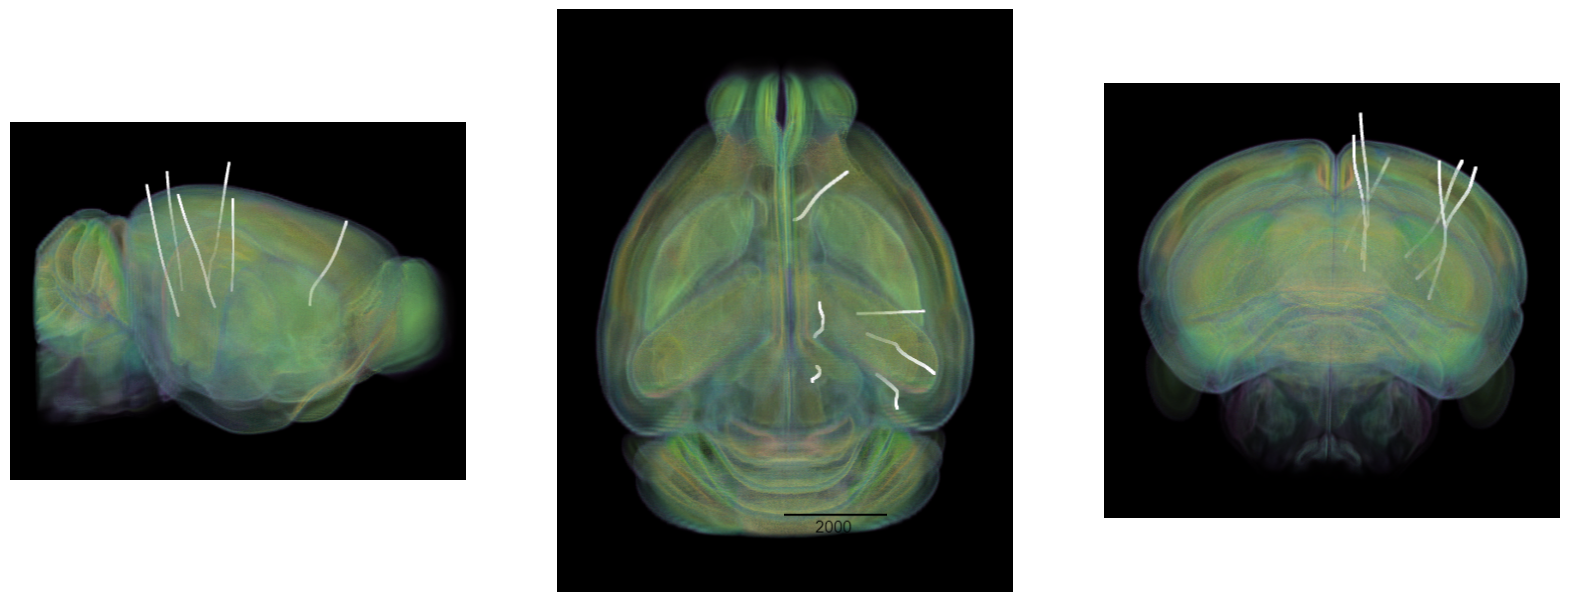

In [8]:
sagittal_view = Image.open("../../data/images/vippo_probes_sagittal.png")
dorsal_view = Image.open("../../data/images/vippo_probes_dorsal.png")
transverse_view = Image.open("../../data/images/vippo_probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)
for ax in axes:
    ax.axis("off")

### Extracting Units Spikes
Below, the `Units` table is retrieved from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit. For more information on the various unit metrics, see [Visualizing Unit Quality Metrics](../visualization/visualize_unit_metrics.ipynb). From this table, the Units used in this notebook are selected if they have 'good' quality rather than 'noise', and if they belong in one of the regions of the primary visual cortex.

In [9]:
units = nwb.units
units[:10]

,isolation_distance,firing_rate,waveform_duration,snr,recovery_slope,silhouette_score,d_prime,nn_hit_rate,local_index,cumulative_drift,...,amplitude_cutoff,cluster_id,l_ratio,peak_channel_id,nn_miss_rate,amplitude,presence_ratio,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
18,62.492077,1.742578,0.494472,2.450750,-0.030226,-1.000000,4.643742,0.999333,0,505.46,...,0.500000,0,6.046824e-04,1,0.000147,116.028900,0.99,"[20.794914708635652, 21.05288054852111, 21.374...","[8.717465548335691e-05, 9.321918347252416e-05,...","[[0.0, -0.17491499999999904, -0.54755999999999..."
19,90.052939,3.152424,0.384590,2.409887,-0.058670,0.314916,6.577947,1.000000,1,888.57,...,0.500000,1,3.057554e-06,2,0.000070,106.408770,0.96,"[281.88207792357804, 281.89851120424265, 355.2...","[0.00011114883932228667, 0.0001260206376837019...","[[0.0, 0.8718450000000002, 1.5972450000000002,..."
20,65.669788,1.573082,0.384590,2.785946,-0.158855,0.224916,6.946958,0.998588,2,595.34,...,0.009157,2,1.087791e-04,3,0.000105,141.822915,0.99,"[21.878377902799876, 22.103777180394587, 22.51...","[0.00013811356307560316, 0.0001366471509906464...","[[0.0, 0.023400000000000074, 0.286455000000000..."
21,196.636729,17.836571,0.398325,2.752507,-0.074757,0.185229,6.238170,1.000000,3,377.36,...,0.500000,3,8.393691e-07,5,0.000607,121.522440,0.99,"[20.239283156102932, 20.255883102900057, 20.26...","[0.00012139984365146841, 0.0001388099622892501...","[[0.0, 0.006240000000000578, -0.47541000000000..."
22,58.056369,1.573205,0.453266,1.621381,-0.010145,0.194907,5.029338,0.933333,4,821.81,...,0.183039,4,3.906953e-03,0,0.000548,60.627450,0.99,"[21.26001321799368, 25.052234397247975, 25.107...","[5.855642507358295e-05, 6.434288592337668e-05,...","[[0.0, -0.2628599999999941, -0.474434999999997..."
23,100.418253,7.121030,0.192295,2.862798,-0.117355,0.111176,5.830520,0.997333,5,291.23,...,0.172972,5,2.206311e-04,6,0.002660,120.923595,0.99,"[20.192483306096577, 20.21511656689025, 20.259...","[0.00011135892665825013, 0.0001153247761182010...","[[0.0, -0.022815000000002916, -0.3732300000000..."
24,154.431225,23.845385,0.206030,3.385598,-0.194703,0.195984,7.394349,0.997333,6,279.41,...,0.000915,6,6.061800e-04,9,0.001592,196.427790,0.99,"[20.21568323174075, 20.24071648484244, 20.3194...","[0.00022289234227400943, 0.0002896158241278424...","[[0.0, 0.25661999999999896, 0.1581449999999995..."
25,97.792475,0.285725,0.274707,2.781080,-0.122711,0.057737,6.789269,0.960000,7,259.56,...,0.500000,7,4.833791e-07,9,0.000101,161.452785,0.72,"[179.26237348667237, 223.28753238592014, 224.3...","[0.00015111629373207325, 0.0001502437746338825...","[[0.0, -0.1595099999999976, -0.504269999999998..."
26,63.656411,3.284731,0.288442,2.698237,-0.109856,0.104387,4.889011,0.958667,8,283.50,...,0.443100,8,8.613003e-03,13,0.002779,119.873910,0.99,"[20.355516116909314, 20.770648119743466, 20.93...","[0.00011124699665116307, 0.0001186754977555360...","[[0.0, -0.11173500000000058, -0.42003000000000..."


In [10]:
nwb.electrodes[:10]

,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
0,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,20,43,0,0,True,7813.0,3311.0,6474.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,20,11,0,1,True,7811.0,3300.0,6475.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
2,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,40,59,0,2,True,7809.0,3290.0,6475.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
3,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,40,27,0,3,True,7808.0,3279.0,6475.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,60,43,0,4,True,7806.0,3268.0,6476.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
5,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,60,11,0,5,True,7804.0,3257.0,6476.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,80,59,0,6,True,7803.0,3247.0,6477.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
7,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,80,27,0,7,True,7801.0,3236.0,6477.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
8,MB,probeA abc.EcephysElectrodeGroup at 0x20285644...,probeA,100,43,0,8,True,7799.0,3225.0,6478.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


In [11]:
# select electrodes
channel_locations = {}
channel_probes = {}
channel_idxs = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    local_idx = electrodes["local_index"][i]
    probe = electrodes["group_name"][i]
    channel_locations[channel_id] = location
    channel_probes[channel_id] = probe
    channel_idxs[channel_id] = local_idx

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_locations[int(row.peak_channel_id)]

def get_unit_probe(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))
print(set(channel_probes.values()))

{'CA3', 'SSp-bfd6a', 'LP', 'SCig', 'CA1', 'SUB', 'CA2', 'VISl4', 'SSp-bfd2/3', 'SEZ', 'MOs5', 'PL6a', 'SCop', 'VISl6a', 'APN', 'STR', 'RSPv5', 'PO', 'RSPv1', 'VISl6b', 'VISp6a', 'VPL', 'SCzo', 'VISl5', 'ACAv6b', 'RSPv2/3', 'MRN', 'SSp-bfd6b', 'VISp6b', 'VISl2/3', 'TH', 'LSr', 'VISp2/3', 'RSPd5', 'LGd-sh', 'MB', 'DG-mo', 'SCsg', 'VISp5', 'SSp-bfd4', 'ACAd6a', 'PRE', 'RSPd6b', 'SCiw', 'MOs6a', 'VL', 'ACAv6a', 'VISp4', 'LGd-co', 'RSPd2/3', 'RSPd6a', 'SSp-bfd5', 'MOs2/3', 'SCdg'}
{'probeA', 'probeC', 'probeD', 'probeB', 'probeE', 'probeF'}


In [12]:
### selecting units spike times

brain_regions = ["VISp6a", "VISp5", "VISp4", "VISp6b", "VISp2/3"]

# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for row in units:
    # if get_unit_location(row) in brain_regions and row.quality.item() == "good":
    if get_unit_location(row) in brain_regions and row.quality.item() == "good":
        units_spike_times.append(row.spike_times.item())

units_spike_times = np.array(units_spike_times)
print(len(units_spike_times))

227


C:\Users\carter.peene\AppData\Local\Temp\ipykernel_27548\1753309062.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  units_spike_times = np.array(units_spike_times)


### Session Timeline

In [13]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [14]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# manually add optotagging epoch since the table is stored separately
# opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
# opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
# epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

36
('Stim01_SAC_Wd15_Vel2_White_loop_presentations', 0.0, 342.10204, 450.19255)
('Stim02_SAC_Wd45_Vel2_White_loop_presentations', 1.0, 450.19255, 558.2831)
('Stim03_SAC_Wd15_Vel2_White_oneway_1_presentations', 2.0, 558.2831, 612.32841)
('Stim04_SAC_Wd15_Vel2_Black_loop_presentations', 3.0, 612.32841, 720.41894)
('Stim05_SAC_Wd15_Vel2_White_oneway_2_presentations', 4.0, 720.41894, 774.46424)
('Stim06_SAC_Wd15_Vel2_White_scramble_presentations', 5.0, 774.46424, 882.55476)
('Stim07_DOT_Wd15_Vel2_White_loop_presentations', 6.0, 882.55476, 990.64532)
('Stim08_SAC_Wd15_Vel6_White_loop_presentations', 7.0, 990.64532, 1314.9169)
('Stim09_UD_Wd15_Vel2_White_loop_presentations', 8.0, 1314.9169, 1423.0074)
('Stim10_ROT_Wd15_Vel2_White_loop_presentations', 9.0, 1423.0074, 1531.09792)
('Stim11_Ring_Wd15_Vel2_White_loop_presentations', 10.0, 1531.09792, 1639.18845)
('Stim12_Disk_Wd15_Vel2_White_loop_presentations', 11.0, 1639.18845, 1747.29566)
('Stim13_SAC_Wd15_Vel2_Disco_loop_presentations', 12.0,

In [15]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

342 8114


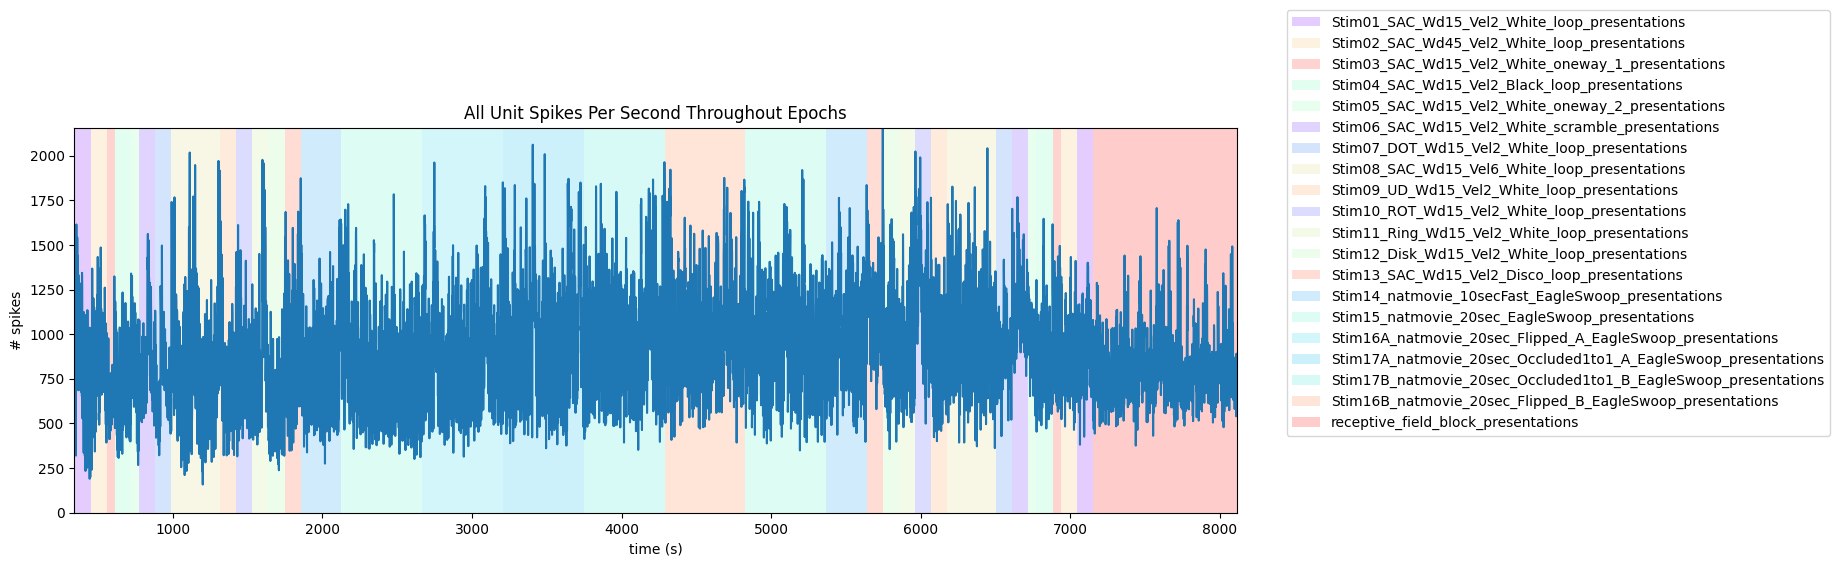

In [16]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec

ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.3, 0.25))
ax.plot(bins[:-1], hist)

### Extracting Stimulus Times

In [19]:
nwb.intervals.keys()

dict_keys(['Stim01_SAC_Wd15_Vel2_White_loop_presentations', 'Stim02_SAC_Wd45_Vel2_White_loop_presentations', 'Stim03_SAC_Wd15_Vel2_White_oneway_1_presentations', 'Stim04_SAC_Wd15_Vel2_Black_loop_presentations', 'Stim05_SAC_Wd15_Vel2_White_oneway_2_presentations', 'Stim06_SAC_Wd15_Vel2_White_scramble_presentations', 'Stim07_DOT_Wd15_Vel2_White_loop_presentations', 'Stim08_SAC_Wd15_Vel6_White_loop_presentations', 'Stim09_UD_Wd15_Vel2_White_loop_presentations', 'Stim10_ROT_Wd15_Vel2_White_loop_presentations', 'Stim11_Ring_Wd15_Vel2_White_loop_presentations', 'Stim12_Disk_Wd15_Vel2_White_loop_presentations', 'Stim13_SAC_Wd15_Vel2_Disco_loop_presentations', 'Stim14_natmovie_10secFast_EagleSwoop_presentations', 'Stim15_natmovie_20sec_EagleSwoop_presentations', 'Stim16A_natmovie_20sec_Flipped_A_EagleSwoop_presentations', 'Stim16B_natmovie_20sec_Flipped_B_EagleSwoop_presentations', 'Stim17A_natmovie_20sec_Occluded1to1_A_EagleSwoop_presentations', 'Stim17B_natmovie_20sec_Occluded1to1_B_EagleSwo

In [20]:
stim_table = nwb.intervals["Stim14_natmovie_10secFast_EagleSwoop_presentations"]
print(np.mean(np.diff(stim_table.start_time)))
print({elem for elem in stim_table.orientation if not np.isnan(elem)})

0.11677066452668293
{0.0}


In [21]:
stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,1855.40287,1855.41955,Stim14_natmovie_10secFast_EagleSwoop,13.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90720, 1, timestamps pynwb.base.TimeSeries a..."
1,1855.41955,1855.43622,Stim14_natmovie_10secFast_EagleSwoop,13.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90721, 1, timestamps pynwb.base.TimeSeries a..."
2,1855.43622,1855.45291,Stim14_natmovie_10secFast_EagleSwoop,13.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90722, 1, timestamps pynwb.base.TimeSeries a..."
3,1855.45291,1855.46958,Stim14_natmovie_10secFast_EagleSwoop,13.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90723, 1, timestamps pynwb.base.TimeSeries a..."
4,1855.46958,1855.48626,Stim14_natmovie_10secFast_EagleSwoop,13.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90724, 1, timestamps pynwb.base.TimeSeries a..."
5,1855.48626,1855.50294,Stim14_natmovie_10secFast_EagleSwoop,13.0,5.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90725, 1, timestamps pynwb.base.TimeSeries a..."
6,1855.50294,1855.51962,Stim14_natmovie_10secFast_EagleSwoop,13.0,6.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90726, 1, timestamps pynwb.base.TimeSeries a..."
7,1855.51962,1855.53630,Stim14_natmovie_10secFast_EagleSwoop,13.0,7.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90727, 1, timestamps pynwb.base.TimeSeries a..."
8,1855.53630,1855.55298,Stim14_natmovie_10secFast_EagleSwoop,13.0,8.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,13.0,[stimulus_time_interval],"[(90728, 1, timestamps pynwb.base.TimeSeries a..."


In [22]:
# select times where there is a local oddball
# stim_select = lambda prev_row, row, next_row: prev_row.orientation.item() == 135.0 and row.orientation.item() == 45.0 and np.isnan(next_row.orientation.item())
stim_select = lambda row: float(row.frame) == 40.0
stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if stim_select(stim_table[i])]
print(len(stim_times))

54


### Generating Spike Matrix

In [23]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [24]:
def get_spike_matrix(units_spike_times, stim_times, bin_edges, time_resolution):
    n_units = len(units_spike_times)
    n_trials = len(stim_times)

    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((n_units, n_trials, len(bin_edges)))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(n_units):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [25]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

spike_matrix = get_spike_matrix(units_spike_times, stim_times, bin_edges, time_resolution)

print(spike_matrix.shape)

(227, 54, 150)


### Showing Response Windows
After generating spike matrices, we can view the PSTHs for each unit.

In [26]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [27]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 3*rows), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)


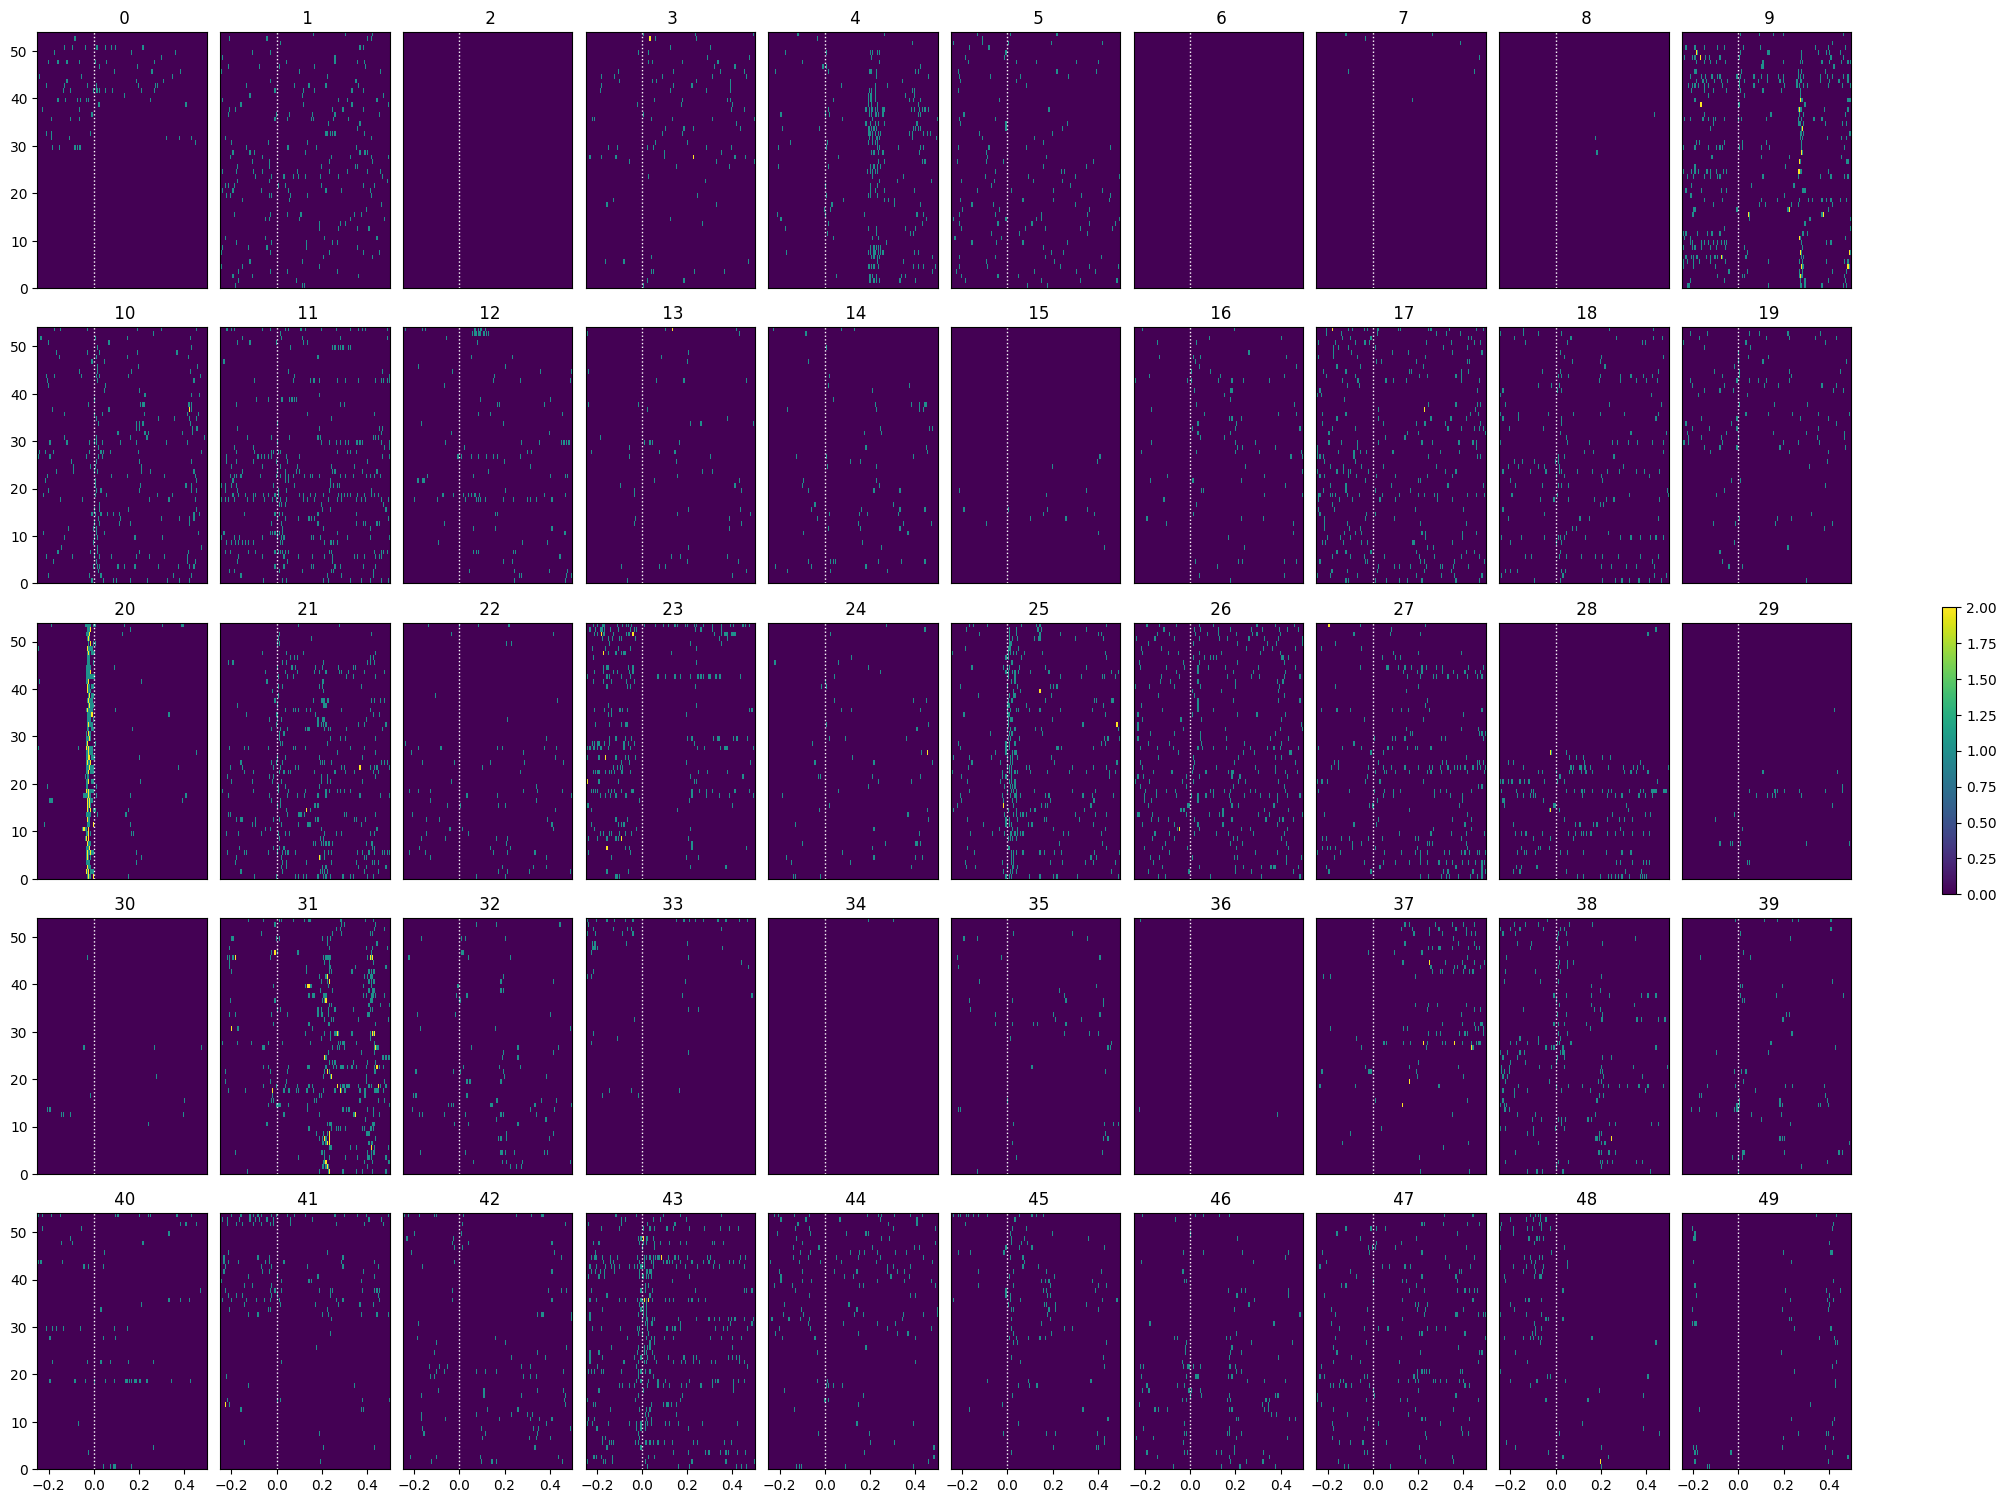

In [28]:
show_many_responses(spike_matrix, 5, 10)

### Selecting Responsive Cells
As discussed in [Statistically Testing 2P Responses to Stimulus](../first-order/test_2p_responses.ipynb), the criteria used to select for responsive cells can have a significant impact. Here, the simple criterion is to select units whose post-stimulus z-scores are greater than 1 or less than -1.

In [29]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(np.logical_or(unit_z_scores > 1, unit_z_scores < -1))[0]

C:\Users\carter.peene\AppData\Local\Temp\ipykernel_27548\1852969462.py:9: RuntimeWarning: divide by zero encountered in divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
C:\Users\carter.peene\AppData\Local\Temp\ipykernel_27548\1852969462.py:9: RuntimeWarning: invalid value encountered in divide
  unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means


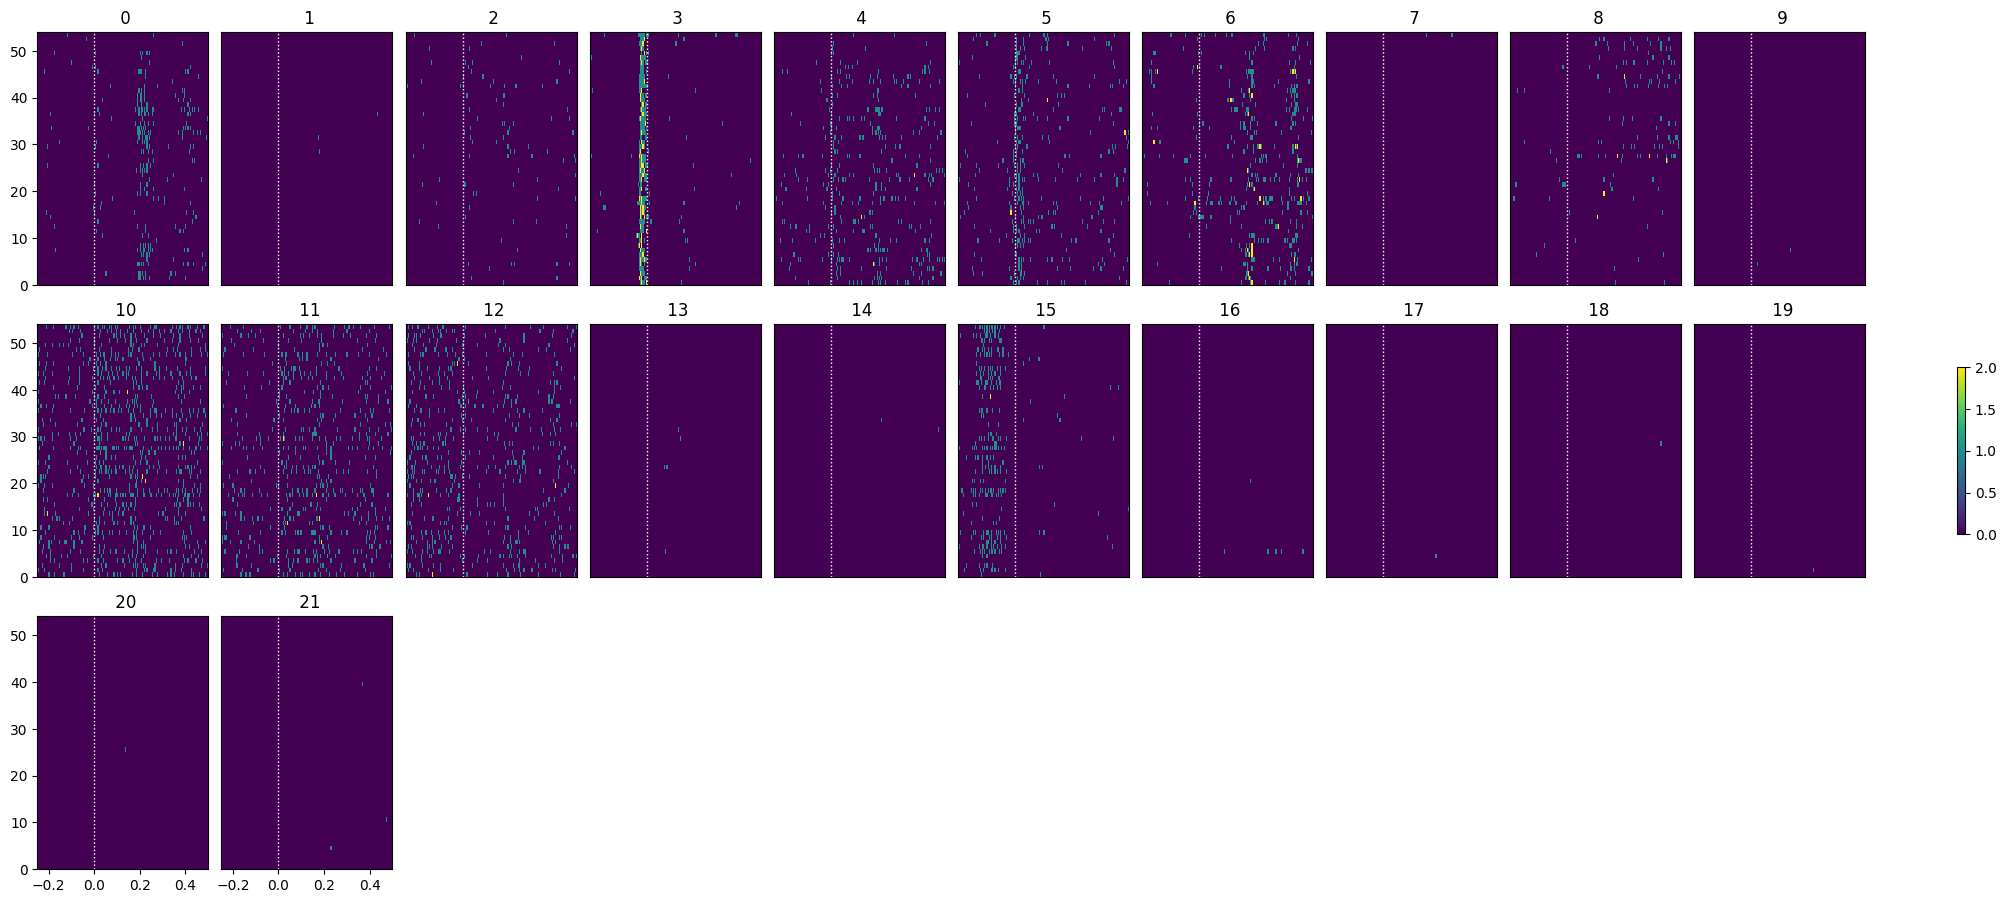

In [30]:
selected_idxs = select_cells(spike_matrix, stimulus_onset_idx)
show_many_responses(spike_matrix[selected_idxs], 5, 10)

### Receptive Fields

In [31]:
rf_stim_table = nwb.intervals["receptive_field_block_presentations"].to_dataframe()
rf_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,color,contrast,mask,opacity,orientation,size,units,stimulus_index,temporal_frequency,spatial_frequency,x_position,y_position,phase,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,7151.94036,7152.19057,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,0.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,30.0,40.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408240, 1, timestamps pynwb.base.TimeSeries ..."
1,7152.19057,7152.44081,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,0.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,40.0,10.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408241, 1, timestamps pynwb.base.TimeSeries ..."
2,7152.44081,7152.69099,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,0.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,40.0,-20.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408242, 1, timestamps pynwb.base.TimeSeries ..."
3,7152.69099,7152.94121,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,0.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,0.0,20.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408243, 1, timestamps pynwb.base.TimeSeries ..."
4,7152.94121,7153.19141,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,45.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,-40.0,30.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408244, 1, timestamps pynwb.base.TimeSeries ..."
5,7153.19141,7153.44165,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,45.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,-40.0,0.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408245, 1, timestamps pynwb.base.TimeSeries ..."
6,7153.44165,7153.69186,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,90.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,40.0,0.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408246, 1, timestamps pynwb.base.TimeSeries ..."
7,7153.69186,7153.94204,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,45.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,0.0,20.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408247, 1, timestamps pynwb.base.TimeSeries ..."
8,7153.94204,7154.19227,receptive_field_block,34.0,"[1.0, 1.0, 1.0]",0.8,circle,1.0,90.0,"[20.0, 20.0]",deg,34.0,4.0,0.08,40.0,0.0,"[29135.93333333, 29135.93333333]",[stimulus_time_interval],"[(408248, 1, timestamps pynwb.base.TimeSeries ..."


In [32]:
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]
print(xs)
print(ys)
print(field_units)

[-40. -30. -20. -10.   0.  10.  20.  30.  40.]
[-40. -30. -20. -10.   0.  10.  20.  30.  40.]
deg


In [33]:
### get receptive field of a unit using its spike times and the stim table

def get_rf(spike_times):
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for stim_time in stim_times:
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [stim_time, stim_time+0.2])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [34]:
### compute receptive fields for each unit in selected units

rfs = []
# for idx in selected_idxs:
for idx in range(spike_matrix.shape[0]):
    these_spike_times = units_spike_times[idx]
    rfs.append(get_rf(these_spike_times))

In [35]:
### display the receptive fields for each unit in a 2D plot

def display_rfs(rfs, n_cols=10):
    if len(rfs) == 0:
        print("No receptive fields provided. Nothing to display")
        return

    n_rows = len(rfs) // n_cols
    fig, axes = plt.subplots(n_rows+1, 10)
    fig.set_size_inches(12, n_rows+1)

    # handle case where there's <= n_cols rfs
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for irf, rf in enumerate(rfs):
        ax_row = int(irf/10)
        ax_col = irf%10
        axes[ax_row][ax_col].imshow(rf, origin="lower")
    for ax in axes.flat[1:]:
        ax.axis('off')

    # making axis labels for first receptive field
    axes[0][0].set_xlabel(field_units)
    axes[0][0].set_ylabel(field_units)
    axes[0][0].xaxis.set_label_position("top") 
    axes[0][0].xaxis.set_ticks_position("top")
    axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
    axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].xaxis.get_ticklabels()) if i % 2 != 0]
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].yaxis.get_ticklabels()) if i % 2 != 0]


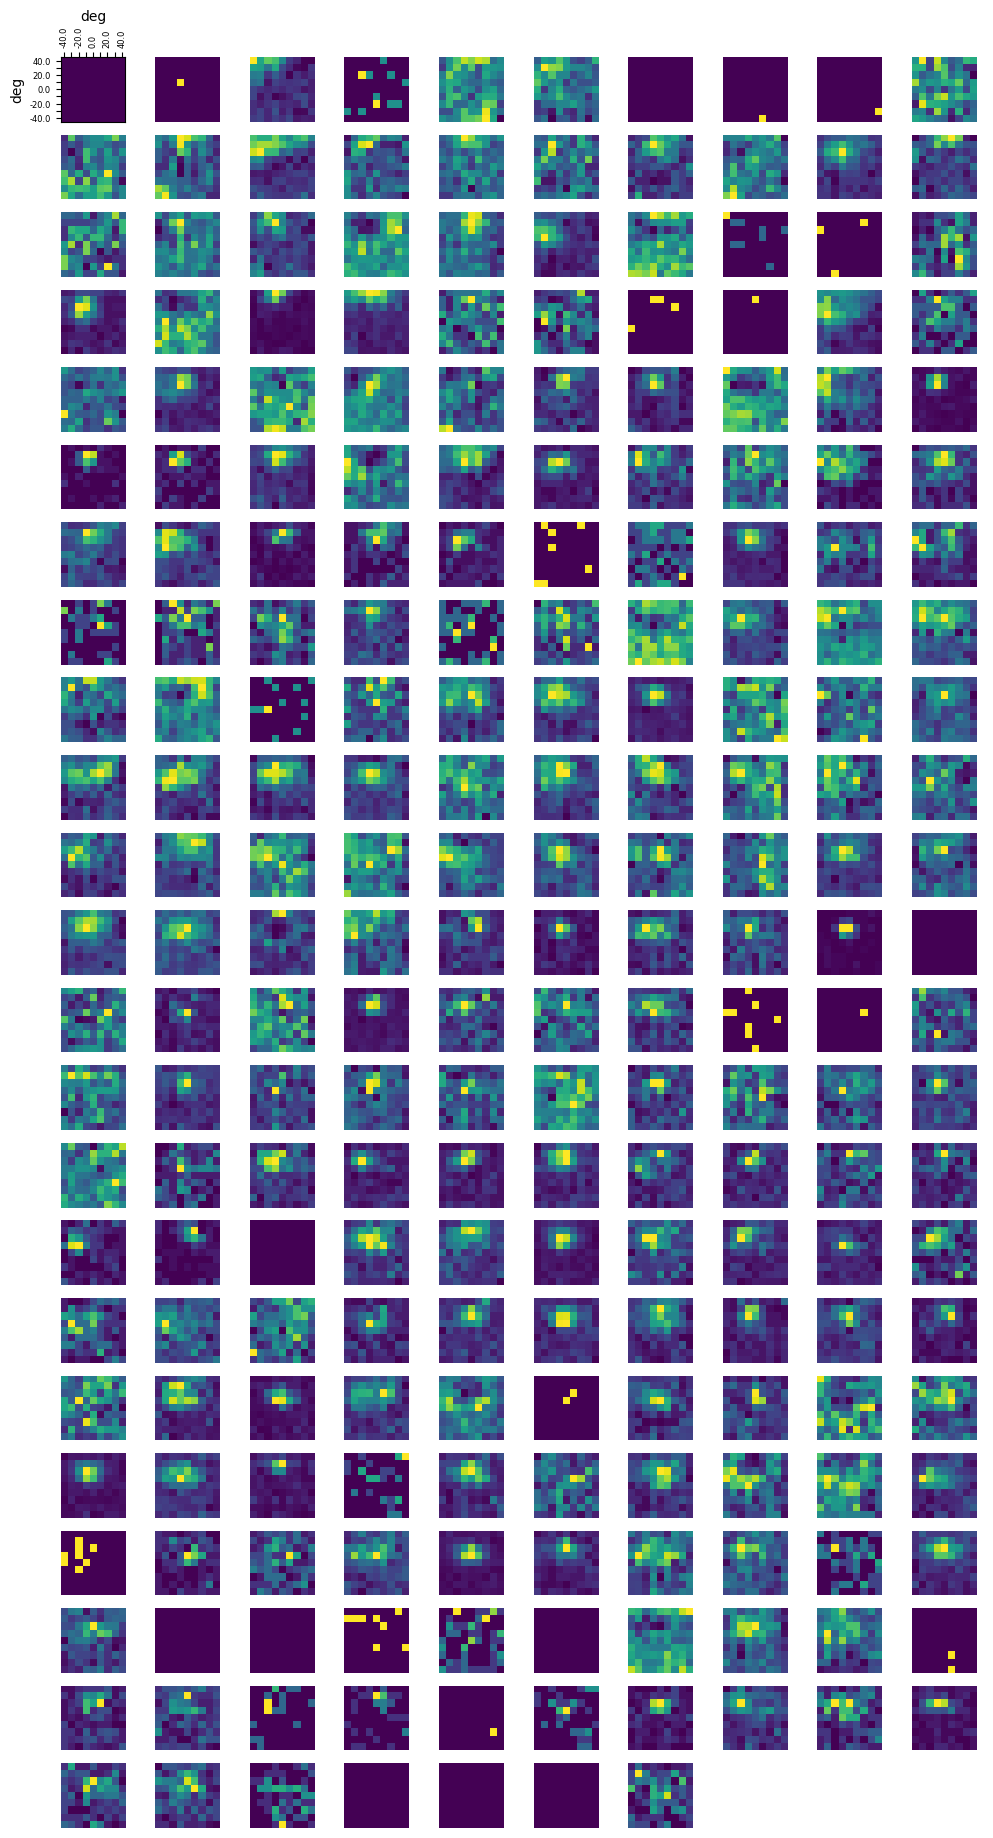

In [36]:
display_rfs(rfs)